# Language Detection Model


### Import Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import re
import joblib

In [2]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nabee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Function to Load Dataset from a CSV File


In [3]:
def load_data(file_path):
    """Load data from a CSV file."""
    df = pd.read_csv(file_path)
    return df

### Function to Explore the Data


In [4]:
def explore_data(df):
    """Explore the loaded data."""
    print(df.head())
    print(df.info())
    print(df.describe())

### Function to Visualize Language Distribution


In [5]:
def visualize_language_distribution(df):
    """Visualize the distribution of languages in the dataset."""
    language_counts = df['Language'].value_counts()
    plt.figure(figsize=(10, 6))
    language_counts.plot(kind='bar', color='skyblue')
    plt.title('Language Distribution')
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.show()

### Function to create Word Cloud


In [6]:
def create_wordclouds(df):
    """Generate and display word clouds for each language."""
    for language in df['Language'].unique():
        text = ' '.join(df[df['Language'] == language]['Text'])
        wordcloud = WordCloud(width=800, height=400,
                              background_color='white').generate(text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {language}')
        plt.axis('off')
        plt.show()

### Function to Analyze Text Length


In [7]:
def analyze_text_length(df):
    """Analyze and visualize text length in the dataset."""
    df['Text Length'] = df['Text'].apply(len)
    plt.figure(figsize=(10, 6))
    plt.hist(df['Text Length'], bins=50, color='lightcoral', edgecolor='black')
    plt.title('Histogram of Text Length')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

### Function to Generate Box Plot for Text Length by Language


In [8]:
def boxplot_text_length_by_language(df):
    """Generate a box plot of text length by language."""
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Language', y='Text Length', data=df, palette='viridis')
    plt.title('Box Plot of Text Length by Language')
    plt.xlabel('Language')
    plt.ylabel('Text Length')
    plt.show()

### Function to Generate Visualization for Language Proportion


In [9]:
def pie_chart_language_proportions(df):
    """Generate a pie chart showing language proportions."""
    plt.figure(figsize=(8, 8))
    df['Language'].value_counts().plot.pie(autopct='%1.1f%%', colors=[
        'lightblue', 'lightgreen', 'lightcoral'])
    plt.title('Language Proportions')
    plt.show()

### Function to Visualize Text Length vs. Language


In [10]:
def scatter_plot_text_length_vs_language(df):
    """Generate a scatter plot of text length vs. language."""
    plt.figure(figsize=(12, 8))
    plt.scatter(df['Text Length'], df['Language'], alpha=0.5, color='darkblue')
    plt.title('Scatter Plot of Text Length vs. Language')
    plt.xlabel('Text Length')
    plt.ylabel('Language')
    plt.show()

### Function to Filter Dataset by Language


In [11]:
def filter_dataset(df, languages):
    filtered_df = df[df['Language'].isin(languages)]

    return filtered_df

### Function to Preprocess the Text


In [12]:
def preprocess_text(filtered_df):
    """Preprocess text data using stemming and stopwords removal."""
    ps = PorterStemmer()
    corpus = []

    for i in range(0, len(filtered_df)):
        review = re.sub('[^a-zA-Z]', ' ', filtered_df['Text'].iloc[i])
        review = review.lower()
        review = review.split()

        review = [ps.stem(word)
                  for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)

    return corpus

### Convert Sentences into Vector


In [13]:
def vectorize_sentences(corpus):
    """Vectorize the preprocessed text data."""
    cv = CountVectorizer(max_features=10000)

    X = cv.fit_transform(corpus).toarray()
    X.shape
    return X

### Function to perform Label Encoding


In [14]:
def label_encoding(filtered_df):
    """Encode the language labels."""
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(filtered_df['Language'])
    y
    len(y)
    label_encoder.classes_
    return y, label_encoder

### Function to Generate Final Dataset


In [15]:
def generate_final_dataset(corpus, y):
    """Generate the final dataset for training."""
    final_df = pd.DataFrame(np.c_[corpus, y], columns=['Text', 'Language'])
    final_df
    return final_df

### Function to Split Training and Testing Data


In [16]:
def split_train_test_data(final_df):
    # Assuming final_df contains your data

    X = final_df['Text']
    y = final_df['Language']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Display the shapes of the resulting sets

    print("Training set shape:", X_train.shape, y_train.shape)
    print("Testing set shape:", X_test.shape, y_test.shape)

    return X_train, X_test, y_train, y_test

### Function to Create and Train Model


In [17]:
def train_model(X_train, y_train):
    """Train a Naive Bayes model."""
    model = make_pipeline(CountVectorizer(), MultinomialNB())
    model.fit(X_train, y_train)
    return model

### Function to Test the Model


In [18]:
def test_model(model, X_test):
    """Test the trained model."""
    y_pred = model.predict(X_test)
    y_pred
    return y_pred

### Function to Evalute the Model


In [19]:
def evaluate_model(model, y_pred, X_test, y_test, label_encoder):
    """Evaluate the language detection model and display metrics."""
    accuracy = accuracy_score(y_test, y_pred, normalize=True)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

    class_report = classification_report(
        y_test, y_pred, target_names=label_encoder.classes_)
    print("Classification Report:\n", class_report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(20, 20))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Accent,
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    results_df = pd.DataFrame(
        {'Actual Language': y_test, 'Predicted Language': y_pred})
    print(results_df)

    return model

### Function to Save Model


In [20]:
def save_model(model, vectorizer, label_encoder, filename='language_detection_model.sav'):
    """Save the trained model, vectorizer, and label encoder to a file."""
    joblib.dump((model, vectorizer, label_encoder), filename)

### Function to Load the Model


In [21]:
def load_saved_model(filename='language_detection_model.sav'):
    """Load the saved model, vectorizer, and label encoder from a file."""
    loaded_model, loaded_vectorizer, loaded_label_encoder = joblib.load(
        filename)
    return loaded_model, loaded_vectorizer, loaded_label_encoder

### Main Code to Execute the Model Pipeline


loading data
data loaded
exploring data
                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB
None
                  Text Language
count            10337    10337
unique           10267       17
top     Jag är ledsen.  English
freq                 3     1385
data explored
visualizing language distribution


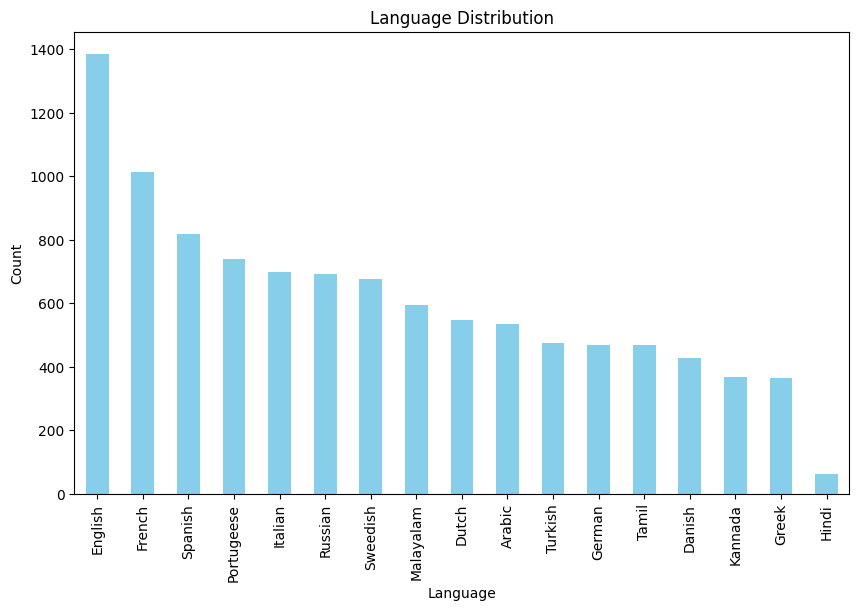

language distribution visualized
generating word clouds


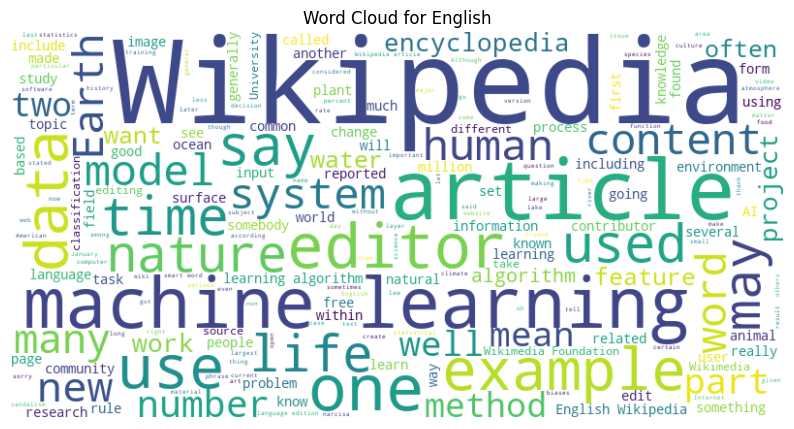

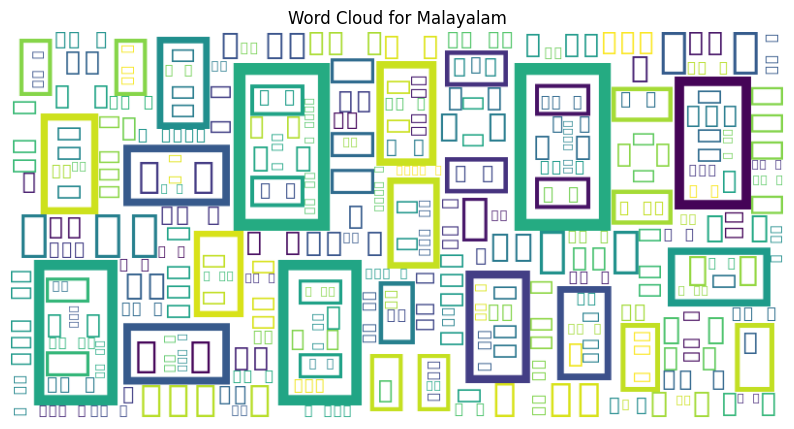

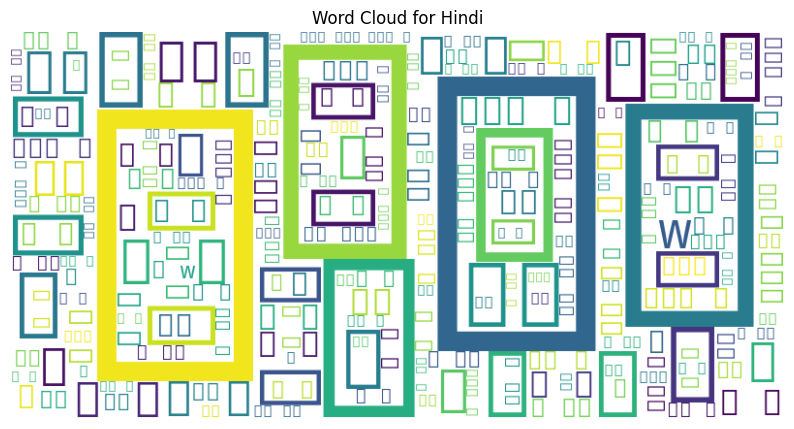

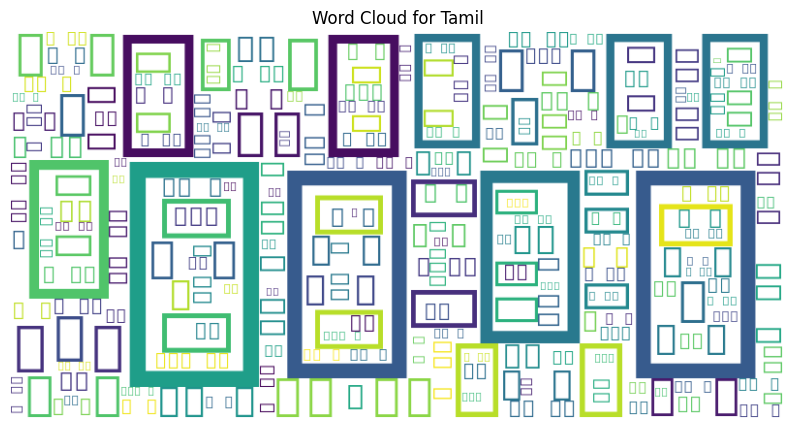

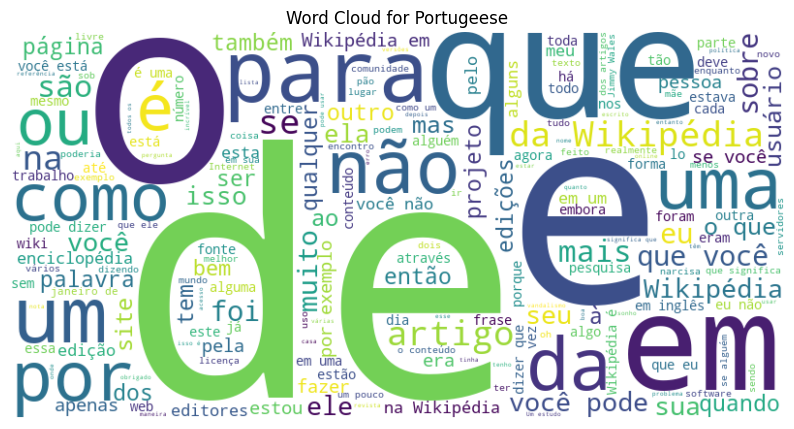

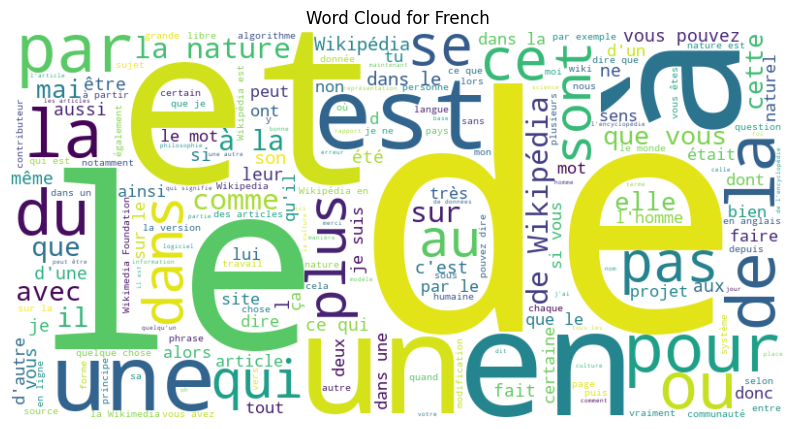

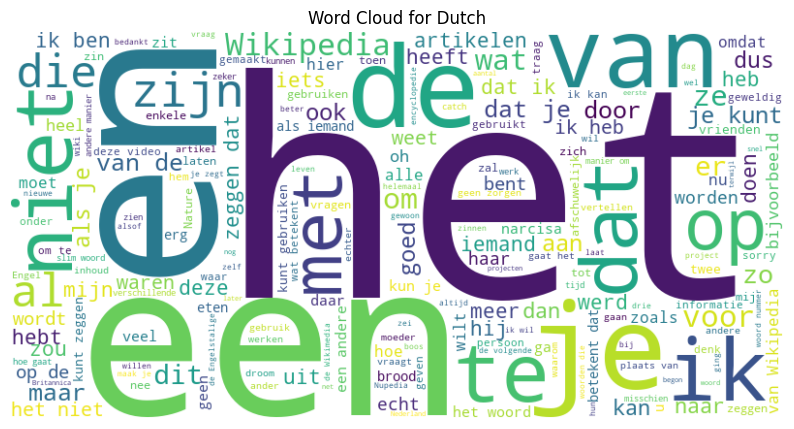

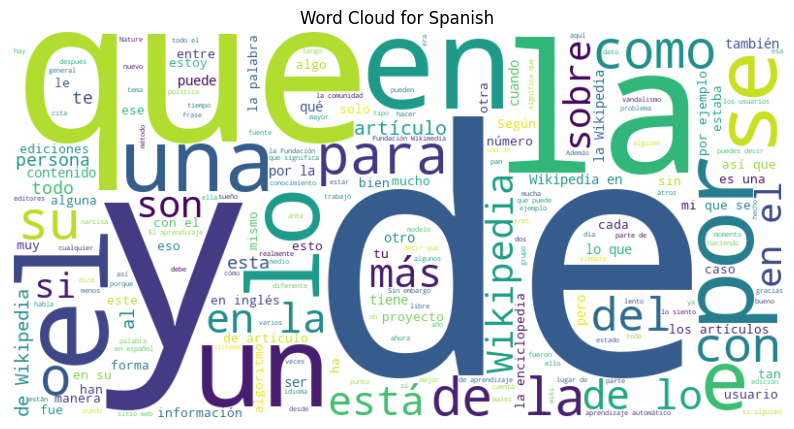

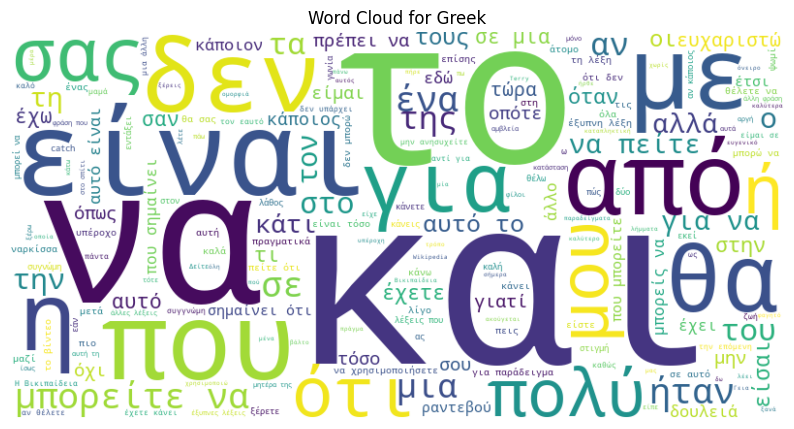

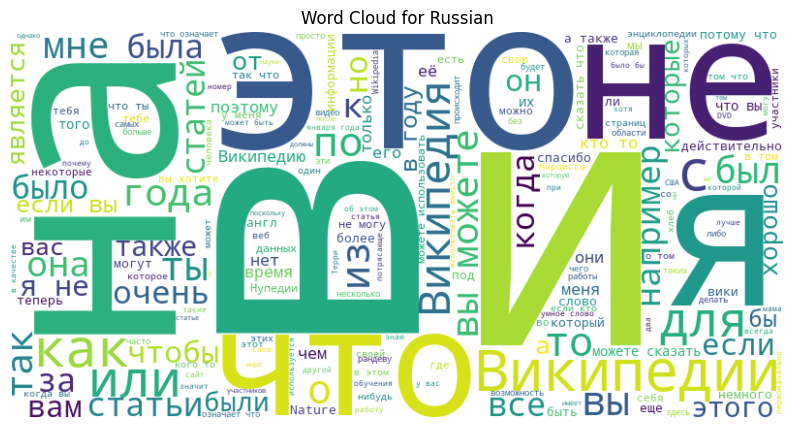

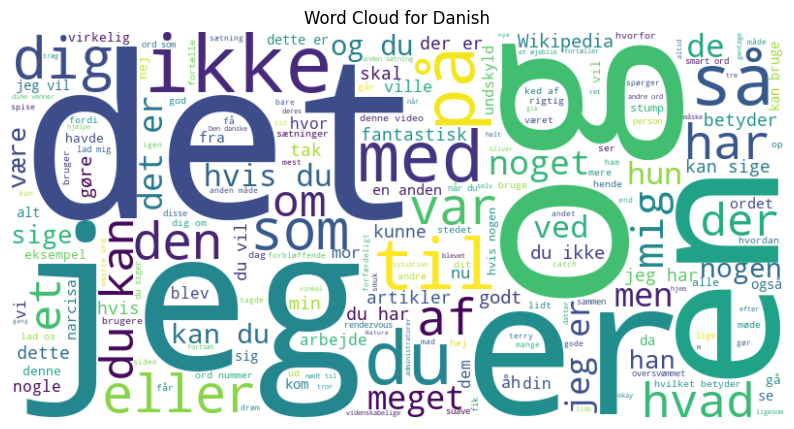

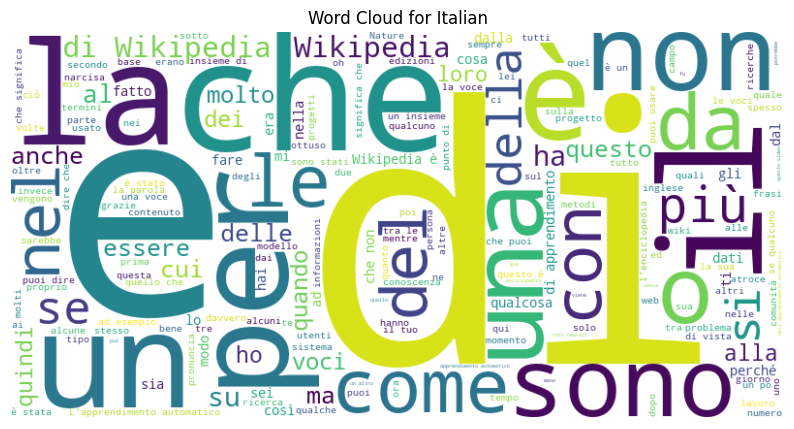

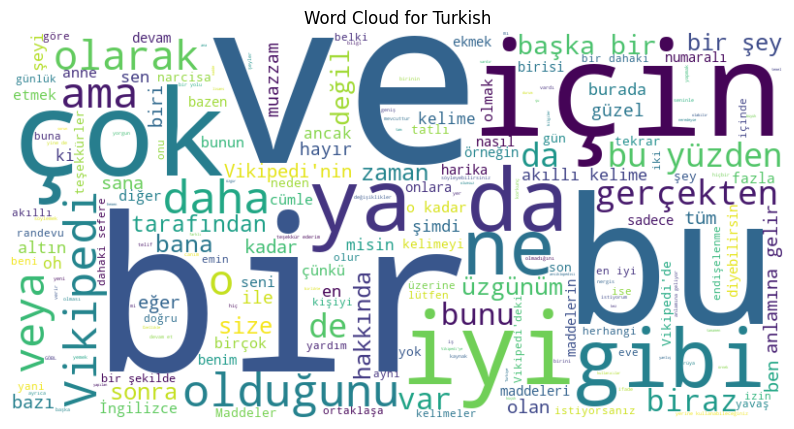

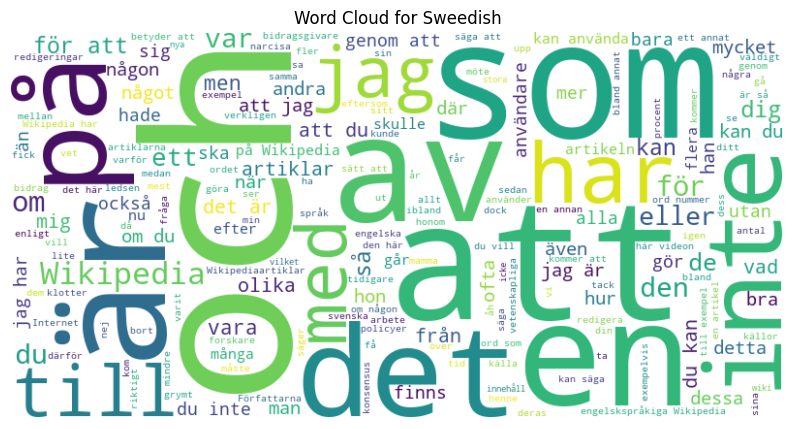

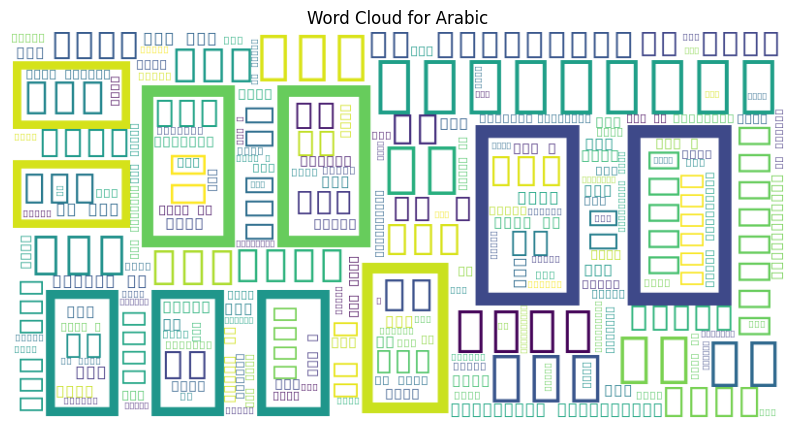

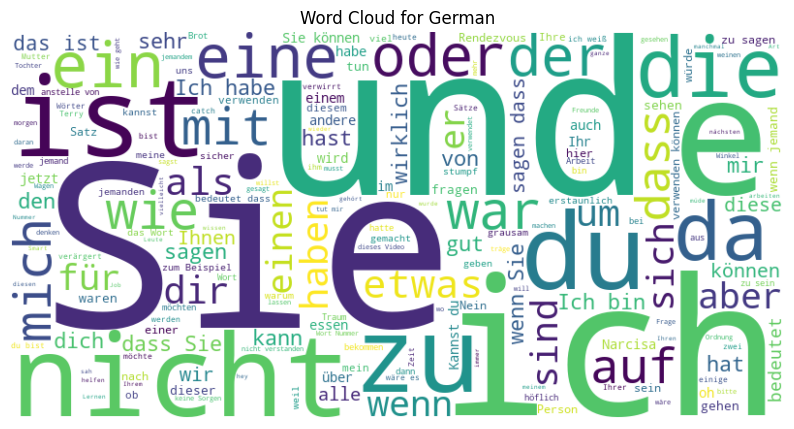

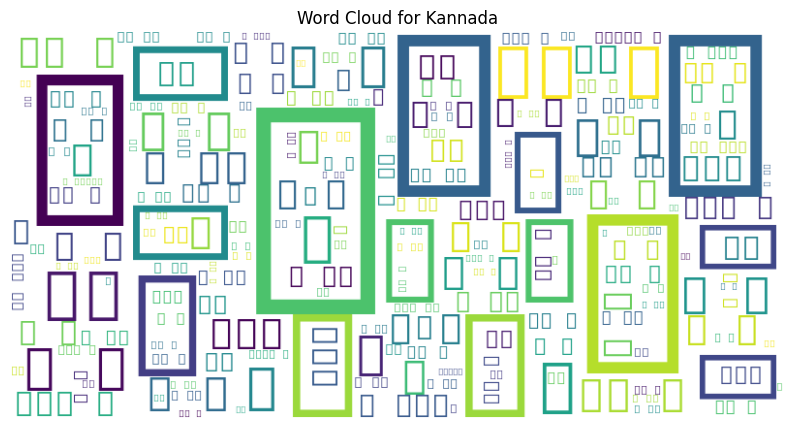

word clouds generated
analyzing text length


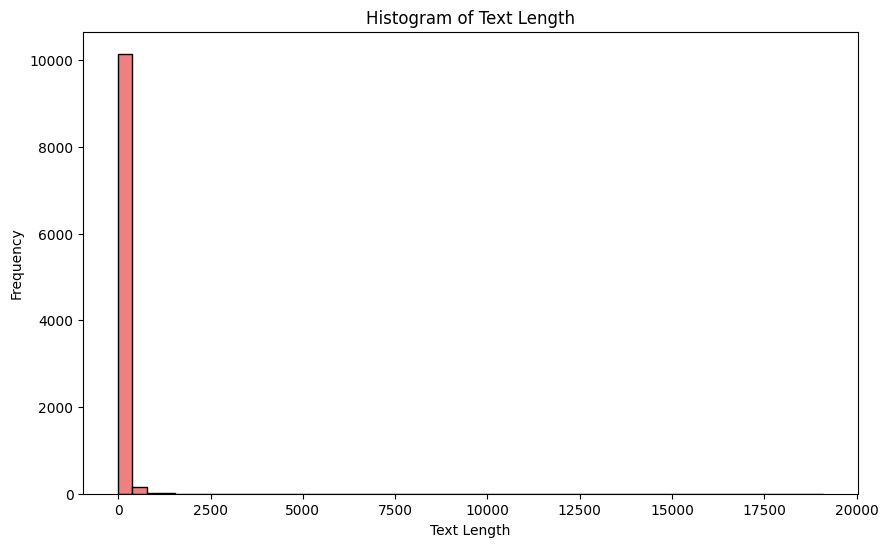

text length analyzed
generating box plot of text length by language


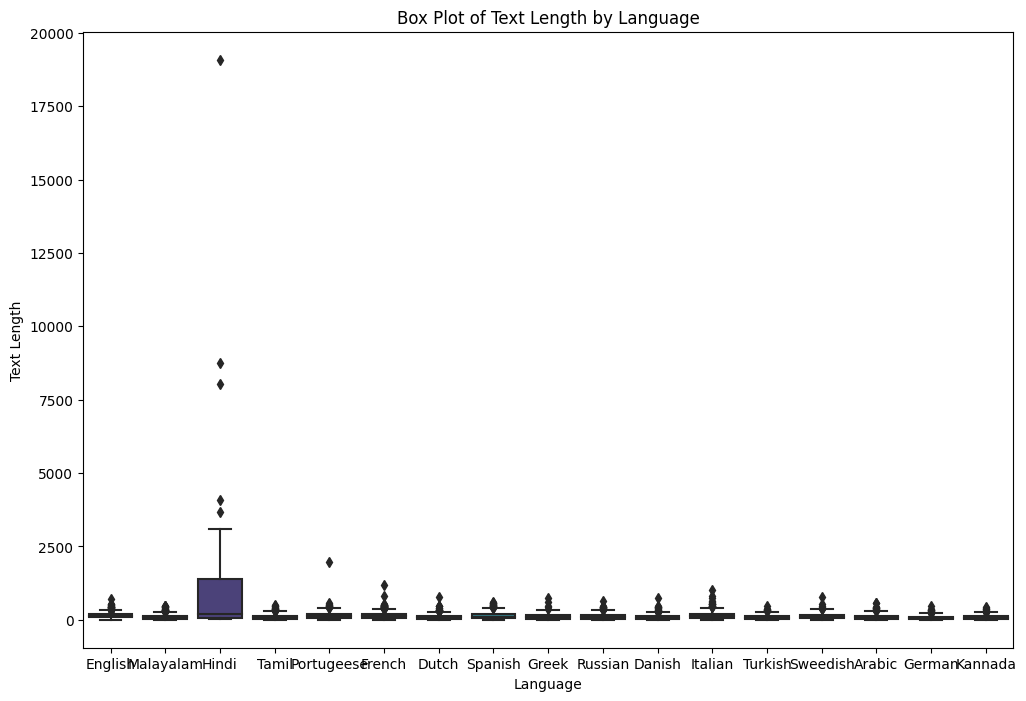

box plot of text length by language generated
generating pie chart of language proportions


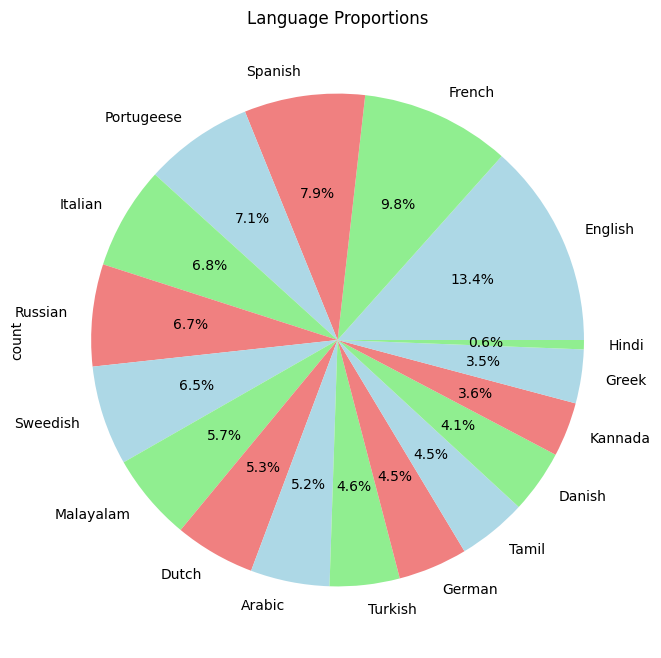

pie chart of language proportions generated
generating scatter plot of text length vs. language


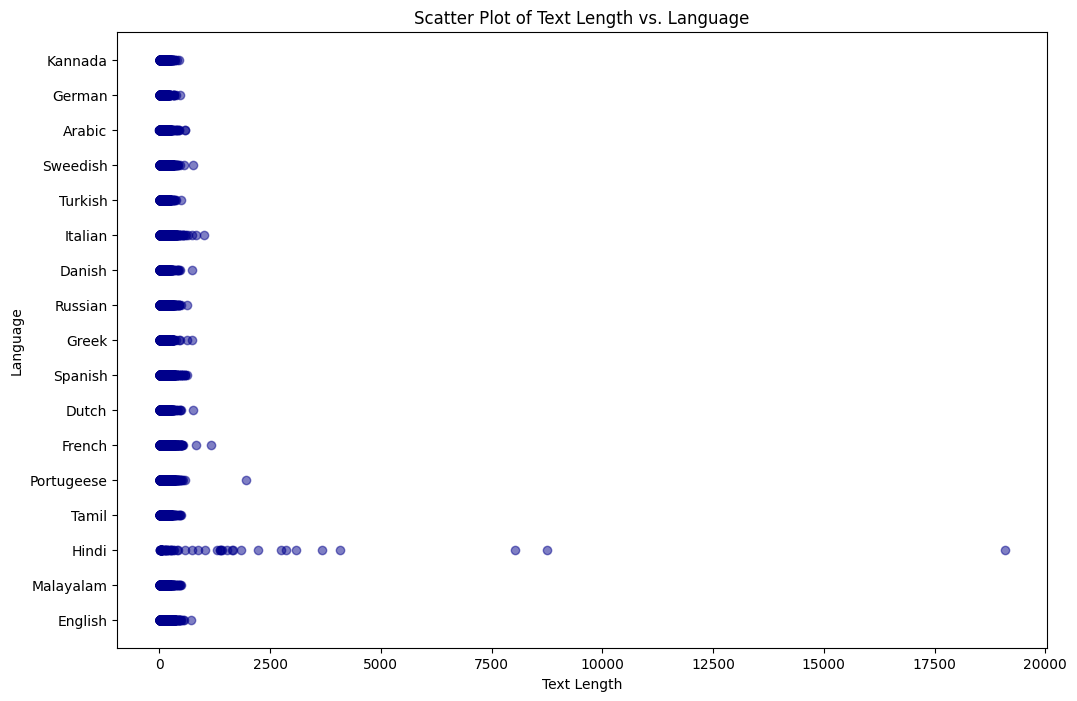

scatter plot of text length vs. language generated
filtering the dataset
dataset filtered
preprocessing text data
text data preprocessed
vectorizing the preprocessed text data
preprocessed text data vectorized
encoding the language labels
language labels encoded
generating the final dataset for training
final dataset generated
splitting the final dataset into training and testing sets
Training set shape: (2574,) (2574,)
Testing set shape: (644,) (644,)
final dataset split
training a Naive Bayes model
Naive Bayes model trained
testing the trained model
trained model tested
evaluating the language detection model and displaying metrics
Accuracy: 0.9984472049689441
Precision: 0.9984553347858606
Recall: 0.9984472049689441
F1-Score: 0.9984468089096876
Classification Report:
               precision    recall  f1-score   support

     English       1.00      1.00      1.00       294
      French       0.99      1.00      1.00       190
     Spanish       1.00      0.99      1.00       160

 

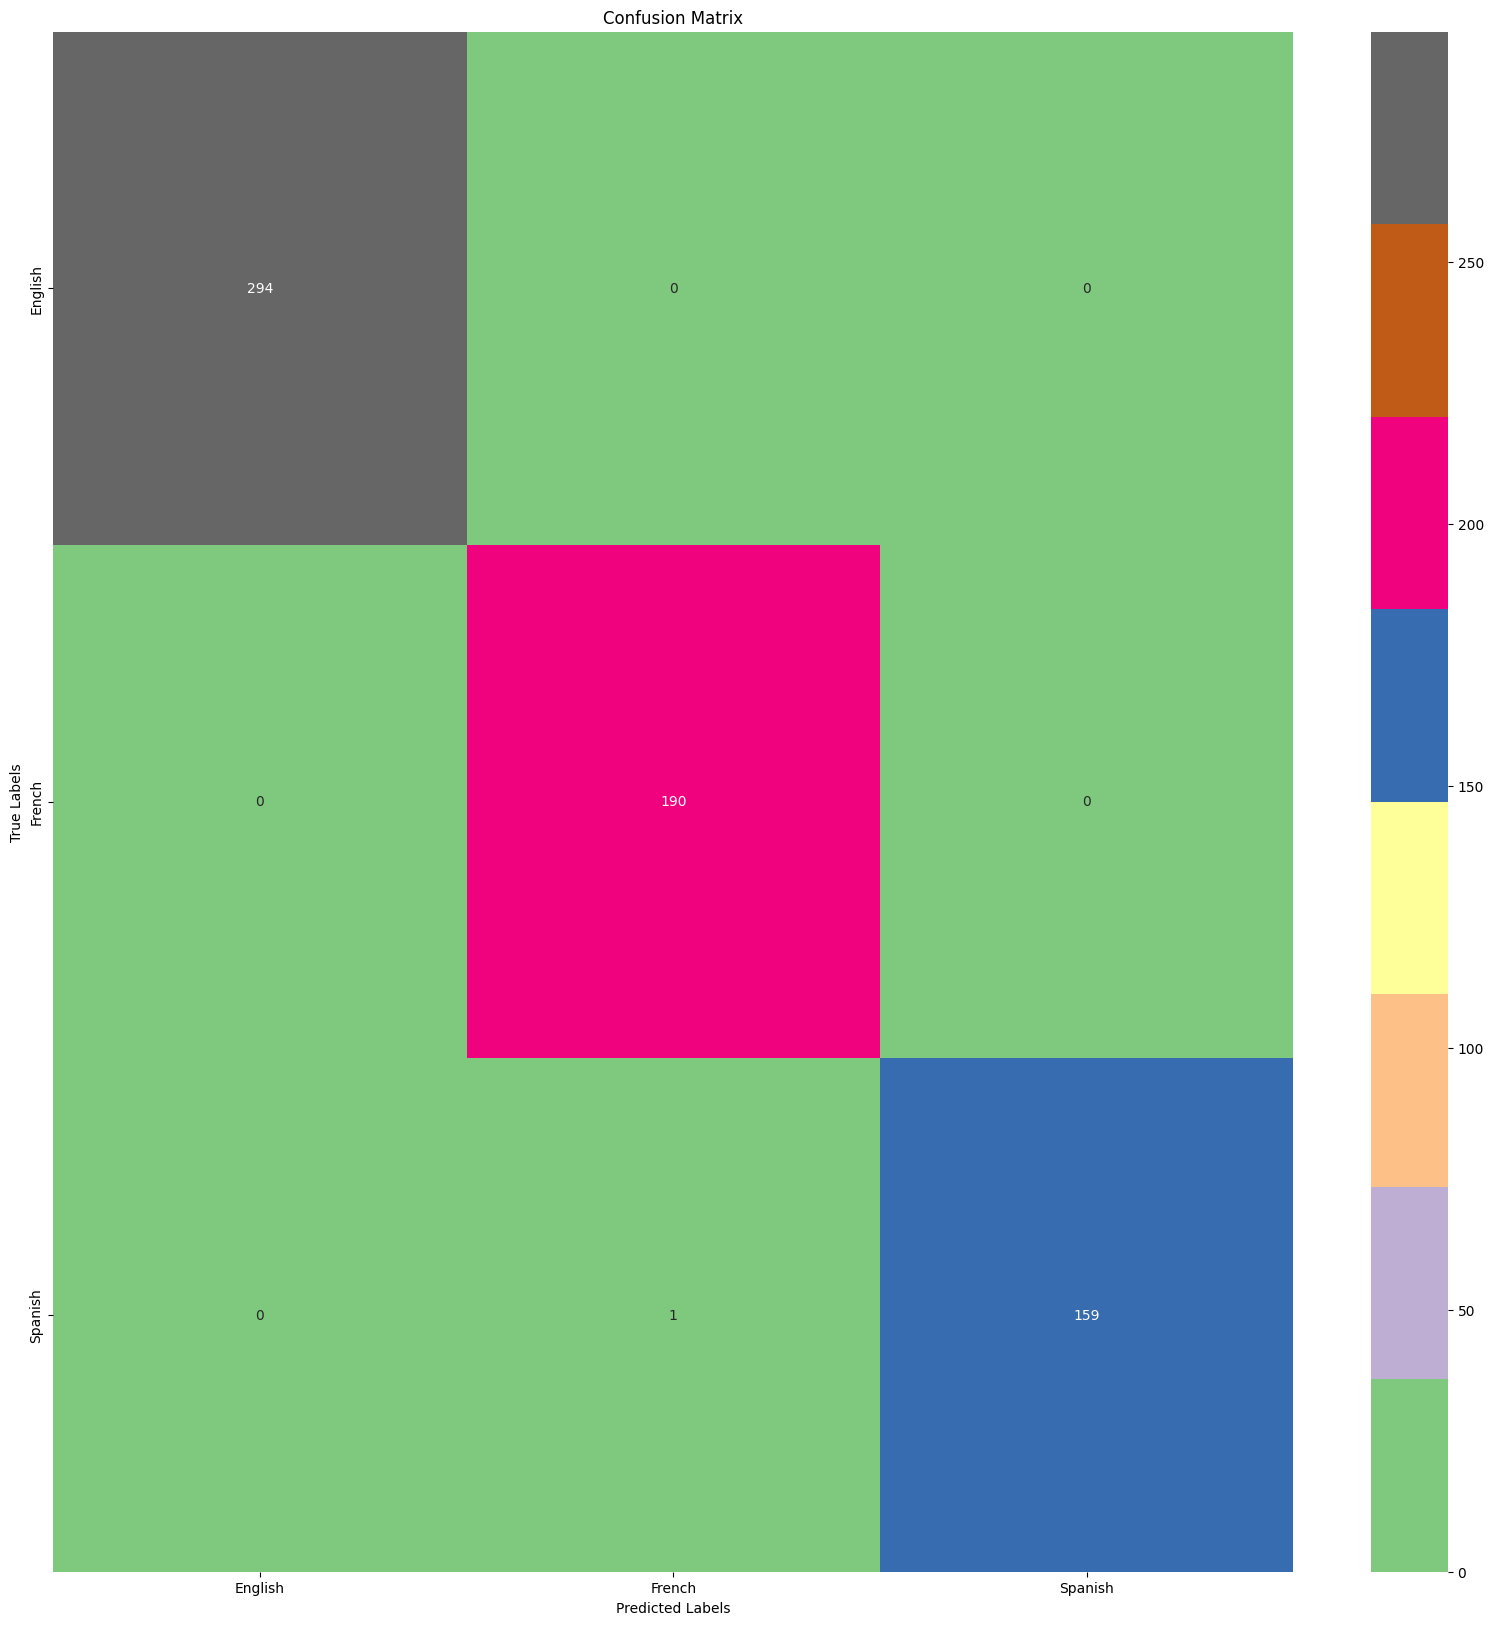

     Actual Language Predicted Language
789                0                  0
2392               1                  1
144                0                  0
1133               0                  0
463                0                  0
...              ...                ...
2332               1                  1
2540               2                  2
2429               2                  2
366                0                  0
1957               1                  1

[644 rows x 2 columns]
language detection model evaluated and metrics displayed
saving the trained model, vectorizer, and label encoder to a file
trained model, vectorizer, and label encoder saved to a file
loading the saved model, vectorizer, and label encoder from a file
saved model, vectorizer, and label encoder loaded from a file
Model training and evaluation completed successfully!


In [22]:
if __name__ == "__main__":
    # Load data
    print('loading data')
    df = load_data('Language Detection.csv')
    print('data loaded')

    # Explore data
    print('exploring data')
    explore_data(df)
    print('data explored')

    # Visualize language distribution
    print('visualizing language distribution')
    visualize_language_distribution(df)
    print('language distribution visualized')

    # Generate word clouds
    print('generating word clouds')
    create_wordclouds(df)
    print('word clouds generated')

    # Analyze text length
    print('analyzing text length')
    analyze_text_length(df)
    print('text length analyzed')

    # Generate a box plot of text length by language
    print('generating box plot of text length by language')
    boxplot_text_length_by_language(df)
    print('box plot of text length by language generated')

    # Generate a pie chart showing language proportions
    print('generating pie chart of language proportions')
    pie_chart_language_proportions(df)
    print('pie chart of language proportions generated')

    # Generate a scatter plot of text length vs. language
    print('generating scatter plot of text length vs. language')
    scatter_plot_text_length_vs_language(df)
    print('scatter plot of text length vs. language generated')

    # Filter the dataset
    print('filtering the dataset')
    languages = ['English', 'French', 'Spanish']
    filtered_df = filter_dataset(df, languages)
    print('dataset filtered')

    # Preprocess text data
    print('preprocessing text data')
    corpus = preprocess_text(filtered_df)
    print('text data preprocessed')

    # Vectorize the preprocessed text data
    print('vectorizing the preprocessed text data')
    X = vectorize_sentences(corpus)
    print('preprocessed text data vectorized')

    # Encode the language labels
    print('encoding the language labels')
    y, label_encoder = label_encoding(filtered_df)
    print('language labels encoded')

    # Generate the final dataset for training
    print('generating the final dataset for training')
    final_df = generate_final_dataset(corpus, y)
    print('final dataset generated')

    # Split the final dataset into training and testing sets
    print('splitting the final dataset into training and testing sets')
    X_train, X_test, y_train, y_test = split_train_test_data(final_df)
    print('final dataset split')

    # Train a Naive Bayes model
    print('training a Naive Bayes model')
    model = train_model(X_train, y_train)
    print('Naive Bayes model trained')

    # Test the trained model
    print('testing the trained model')
    y_pred = test_model(model, X_test)
    print('trained model tested')

    # Evaluate the language detection model and display metrics
    print('evaluating the language detection model and displaying metrics')
    model = evaluate_model(model, y_pred, X_test, y_test, label_encoder)
    print('language detection model evaluated and metrics displayed')

    # Save the trained model, vectorizer, and label encoder to a file
    print('saving the trained model, vectorizer, and label encoder to a file')
    save_model(model, X, y)
    print('trained model, vectorizer, and label encoder saved to a file')

    # Load the saved model, vectorizer, and label encoder from a file
    print('loading the saved model, vectorizer, and label encoder from a file')
    # loaded_model, loaded_vectorizer, loaded_label_encoder = load_saved_model()
    print('saved model, vectorizer, and label encoder loaded from a file')

    print("Model training and evaluation completed successfully!")

### Function to use the Model


In [33]:
def predict_language(sentence):
    """Predict the language of a given sentence."""
    languages = {'0': 'English', '1': 'French', '2': 'Spanish'}

    # Load the saved model, vectorizer, and label encoder from a file
    loaded_model, loaded_vectorizer, loaded_label_encoder = load_saved_model()

    # Predict the language of the input sentence
    y_pred = loaded_model.predict([sentence])

    # Decode the predicted language label
    # predicted_language = loaded_label_encoder.inverse_transform(y_pred)[0]

    return languages[str(y_pred[0])]

### Test the Function


In [34]:
sentence = "This is an English Sentence to check the model"
predicted_language = predict_language(sentence)
print(f"The language of the sentence is: {predicted_language}")

The language of the sentence is: English
